In [5]:
import os
import numpy as np
import pandas as pd
import PIL
import math
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
from keras.applications.resnet50 import ResNet50
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA
import matplotlib.image as mpimg

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.mobilenet import MobileNet,preprocess_input

%matplotlib inline

In [6]:
img_size = 224
model = ResNet50(weights='imagenet', include_top=False,input_shape=(img_size, img_size, 3),pooling='max')


In [7]:
batch_size = 64
root_dir = 'Dataset'
img_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

datagen = img_gen.flow_from_directory(root_dir,target_size=(img_size, img_size),batch_size=batch_size,class_mode=None,shuffle=False)
num_images = len(datagen.filenames)
num_epochs = int(math.ceil(num_images / batch_size))
feature_list = model.predict_generator(datagen, num_epochs)
print("Num images   = ", len(datagen.classes))
print("Shape of feature_list = ", feature_list.shape)

Found 106 images belonging to 9 classes.
Num images   =  106
Shape of feature_list =  (106, 2048)


In [10]:
Num_images=106
Shape_of_feature_list =(106, 2048)

In [14]:
filenames = [root_dir + '/' + i for i in datagen.filenames]
# print(filenames)

In [15]:
neighbors = NearestNeighbors(n_neighbors=5,algorithm='ball_tree',metric='euclidean')
neighbors.fit(feature_list)

NearestNeighbors(algorithm='ball_tree', metric='euclidean')

In [23]:
img_path = 'ant.jpg'
input_shape = (img_size, img_size, 3)
img = image.load_img(img_path, target_size=(input_shape[0], input_shape[1]))
img_array = image.img_to_array(img)
expanded_img_array = np.expand_dims(img_array, axis=0)
preprocessed_img = preprocess_input(expanded_img_array)
test_img_features = model.predict(preprocessed_img, batch_size=1)
indices = neighbors.kneighbors(test_img_features)

# print(test_img_features)

In [24]:
def similar_images(indices):
    plt.figure(figsize=(15,10), facecolor='white')
    plotnumber = 1    
    for index in indices:
        if plotnumber<=len(indices) :
            ax = plt.subplot(2,4,plotnumber)
            plt.imshow(mpimg.imread(filenames[index]), interpolation='lanczos')            
            plotnumber+=1
    plt.tight_layout()
    

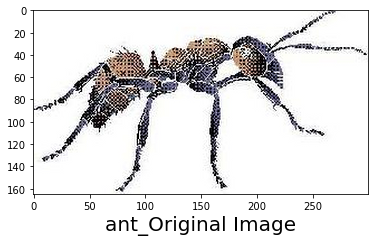

********* Predictions ***********


TypeError: only integer scalar arrays can be converted to a scalar index

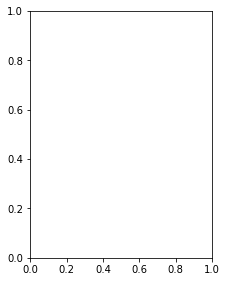

In [39]:
# print(indices.shape)

plt.imshow(mpimg.imread(img_path), interpolation='lanczos')
plt.xlabel(img_path.split('.')[0] + '_Original Image',fontsize=20)
plt.show()
print('********* Predictions ***********')
similar_images(np.array(indices)[0])